In [1]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries, \
                              add_subplotlabels # set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 0 & tutorial name: lennard-jones-fluid
figures will be saved in /docs/sphinx/source/tutorials/figures/level0/lennard-jones-fluid/


In [6]:
def import_ave_time(filename):
    assert filename[:6] == "output"
    if os.path.exists(filename):
        data = np.loadtxt(filename)
        try:
            time, data = data.T
        except:
            time, data, _ = data.T
        if os.path.exists("data_plot/") is False:
            os.mkdir("data_plot/")
        np.savetxt("data_plot/"+filename[7:], np.vstack([time, data]).T)
    else:
        time, data = np.loadtxt("data_plot/"+filename[7:]).T
    return time, data

In [9]:
time, population1 = import_ave_time(filename="output-population1vstime.dat")
time -= time[0]
time *= 0.005
_, population2 = import_ave_time(filename="output-population2vstime.dat")
_, coordination = import_ave_time(filename="output-coordinationnumber12.dat")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


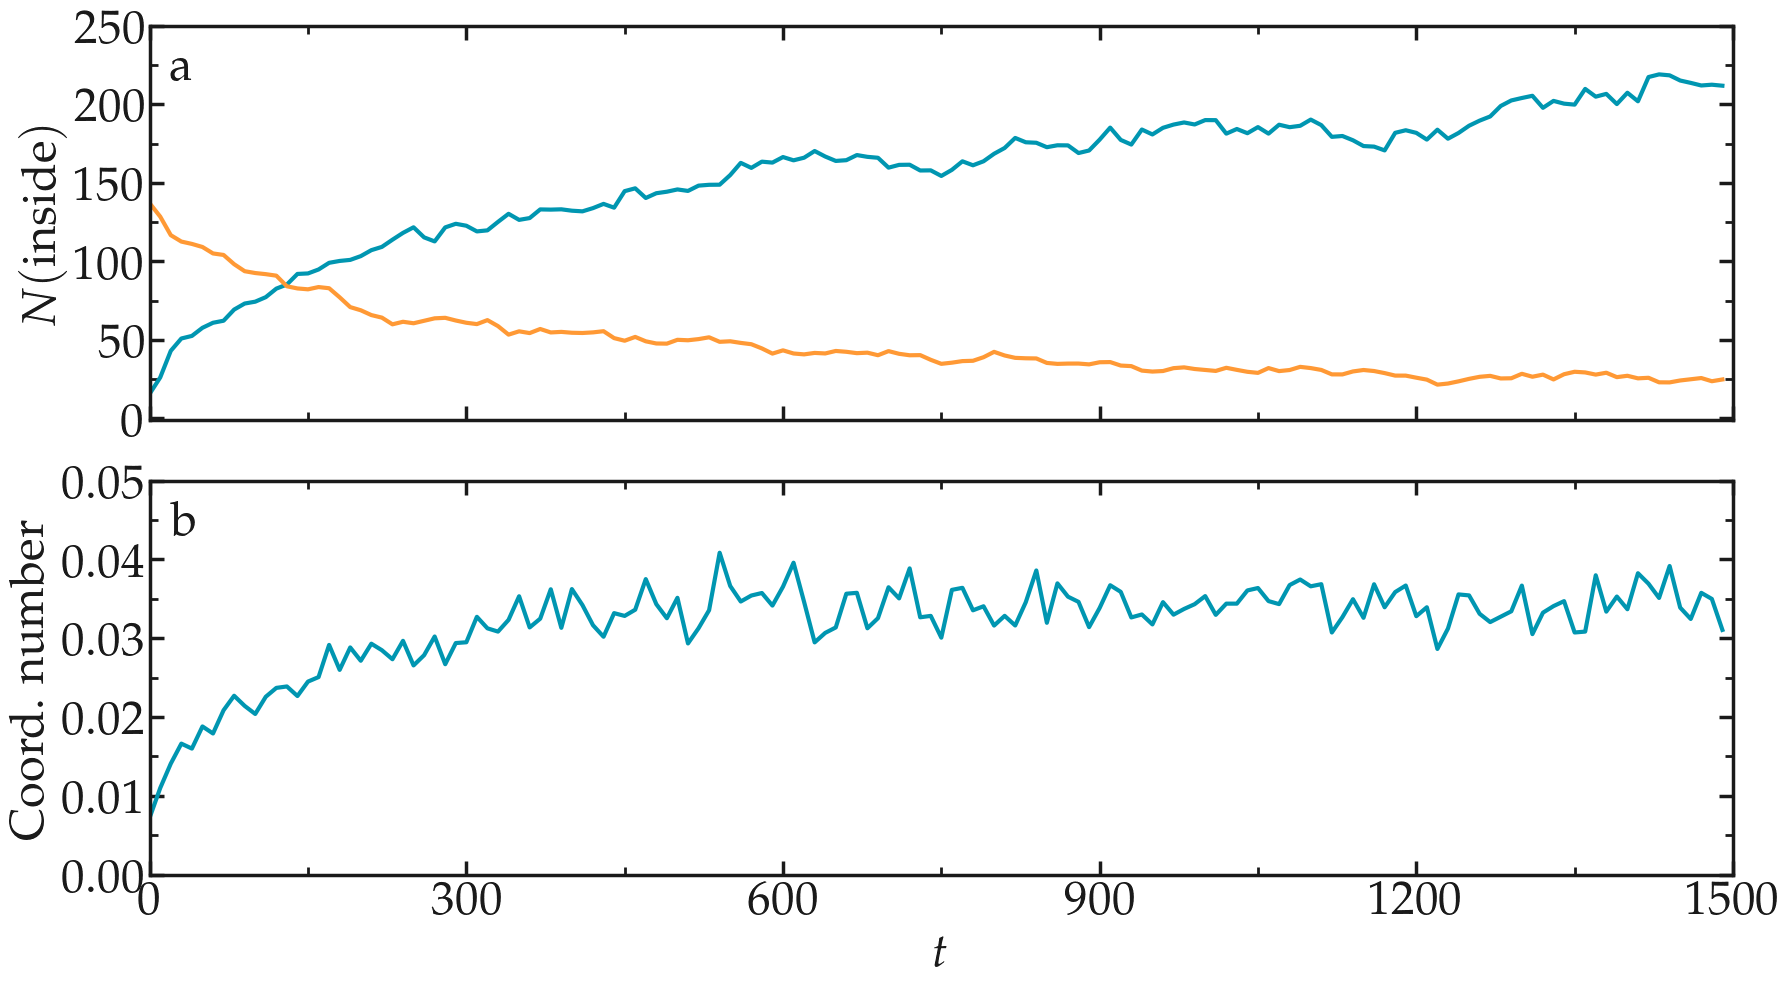

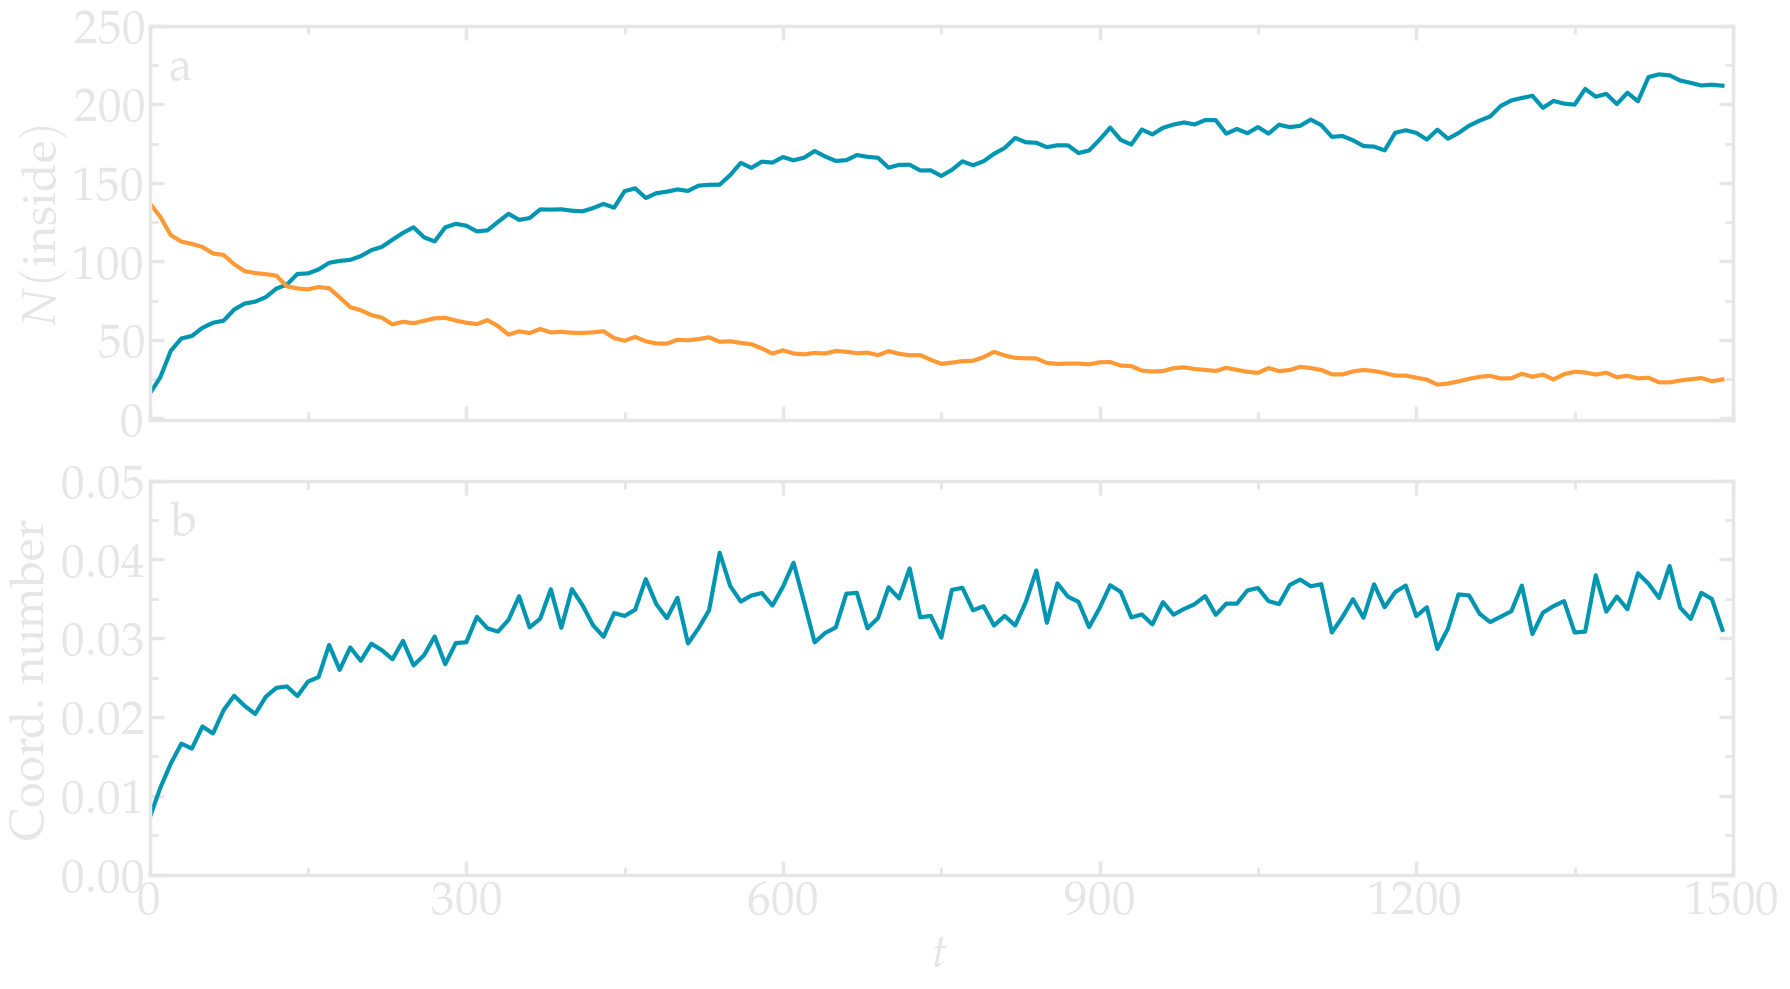

In [10]:
filename = "mixing"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,10))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time, population1,
                linewidth = 3, color=colors["myblue"], label=r"type 1, INSIDE")
    ax[-1].plot(time, population2,
                linewidth = 3, color=colors["myorange"], label=r"type 2, INSIDE")
    complete_panel(ax[-1], None, r'$N (\textrm{inside})$', legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 1800, 300), x_boundaries=(0, 1500),
                   y_ticks=np.arange(0, 300, 50), y_boundaries=(-1, 250))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time, coordination,
                linewidth = 3, color=colors["myblue"])
    complete_panel(ax[-1], r'$t$', r'Coord. number', legend=True, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 1800, 300), x_boundaries=(0, 1500),
                   y_ticks=np.arange(0, 0.06, 0.01), y_boundaries=(0.0, 0.05))
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)